In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

In [33]:
mass = 1000
vi = 0
dt = 0.1
cd = 0.1

In [49]:
def velocity(throttle, current):
    # print(throttle)
    F = throttle - cd * current ** 2
    a = F/mass
    vf = current + a*dt + np.random.normal(0, 0.1)
    return vf

In [50]:
kp = 500
ki = 50
kd = 20

In [46]:
def controller(target_speed, current_speed):
    p = target_speed - current_speed
    d = p/dt
    i = current_speed * dt
    return kp*p + ki*i + kd*d

In [55]:
target = 80
current = vi
result = []
for t in np.arange(0, 100, dt):
    throttle = controller(target, current)
    current = velocity(throttle, current)
    result.append([t,throttle,current])

target = 100
for t in np.arange(100, 150, dt):
    throttle = controller(target, current)
    current = velocity(throttle, current)
    result.append([t,throttle,current])

target = 50
for t in np.arange(150, 250, dt):
    throttle = controller(target, current)
    current = velocity(throttle, current)
    result.append([t,throttle,current])

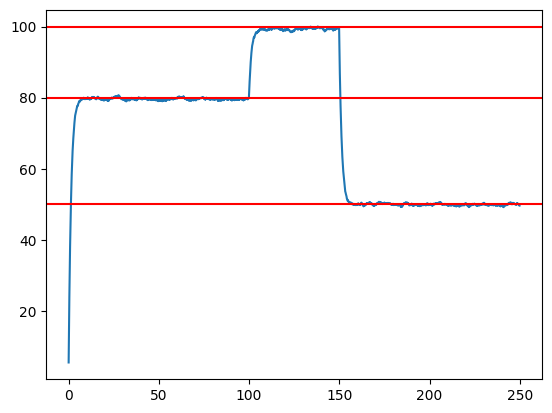

In [56]:
r = np.array(result)
plt.plot(r[:,0], r[:,2])
plt.axhline(80, color="red")
plt.axhline(100, color="red")
plt.axhline(50, color="red")

In [8]:
r

array([[ 0.        ,  8.        , -2.41435486],
       [ 1.        ,  8.24143549,  1.2098215 ],
       [ 2.        ,  7.87901785, -5.08395355],
       [ 3.        ,  8.50839536, -7.38851297],
       [ 4.        ,  8.7388513 , -5.09454393],
       [ 5.        ,  8.50945439,  3.35659052],
       [ 6.        ,  7.66434095, -2.90897142],
       [ 7.        ,  8.29089714,  3.08068274],
       [ 8.        ,  7.69193173,  0.02840517],
       [ 9.        ,  7.99715948, -1.48461979]])